In [113]:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
path = os.getcwd()
###############################################################################


In [114]:
path

'/home/mskaro1/storage/Machine_Learning'

In [ ]:
'''
split data if not aready split:
X= pd.read_csv("~/storage/PanCancerAnalysis/ML_2019/Metastatic_loci_consolidated/one_hot_encoded_labels/TCGA-BRCA_metastatic_data_RNAseq.csv")
X.drop(X.columns[0], axis=1)
# Look at the shape of the data to construct the input layer. 
print('We have {} instances of data with {} variables'.format(*X.shape))


y = X[["Bone","Lung","Liver"]].to_numpy()
n_classes = y.shape[1]
patients = np.array(X.pop('barcode'))
# remove the features labels
X = X.drop(["Bone","Lung","Liver"], axis = 1) 

# Labels are the values we want to predict, retrun and pop them off after
# List of features for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

'''

In [63]:
# Read in the data for the learning model


#X_train = # data for the model to train on
#X_test = # data for the model to test on
#y_train = # labels for the training set
#y_test = # labels for the testing set


X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_train.csv")
X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_test.csv")
y_train = np.array(X_train.pop('Lung'))
y_test = np.array(X_test.pop('Lung'))



In [64]:
print('We have {} instances of data with {} variables'.format(*X_train.shape))
print('We have {} instances of data with {} variables'.format(*X_test.shape))

We have 128 instances of data with 1000 variables
We have 69 instances of data with 1000 variables


In [65]:
# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)
# Fit training data
# this may change once marcus uses the IG algo, gpotta discuss today/tomorrow?, Also are we wrapping in Onevs rest or what?
model.fit(X_train, y_train) # or do we wrap before fit, or is it a different fit call? look at sklearn.documentation

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=77,
                       verbose=1)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


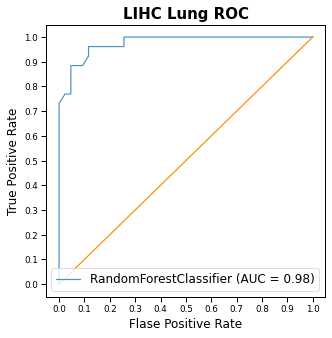

In [110]:
# ROC 
import seaborn as sns
sns.set_context("paper")

from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0,1], [0,1], color='darkorange', linestyle='-')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)

plt.title('LIHC Lung ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('LIHC_Lung_roc_curve.png')

In [67]:
# Compute the average precision score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

y_score = model.predict_proba(X_test)[:,-1]

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


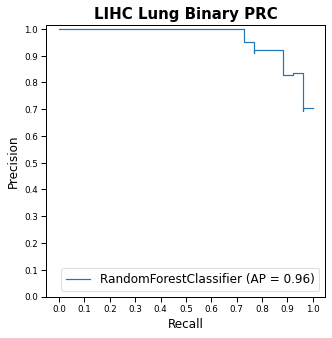

Average precision-recall score RF: 0.9644616613582131


In [112]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

sns.set_context("paper")

fig = plt.figure(figsize=(5,5))
ax = plt.gca()
average_precision = average_precision_score(y_test, y_score, pos_label="Positive")
disp = plot_precision_recall_curve(model, X_test, y_test, ax =ax)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('LIHC Lung Binary PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
print('Average precision-recall score RF: {}'.format(average_precision))
fig.savefig('LIHC_Lung_PRC_curve.png')

In [137]:
average_precision

0.9644616613582131

In [69]:
# DONE

In [192]:
# Make ROC, PRC curves

# Read in each of the data for each cancer type, make the models like above
# Lung
Lung_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
Lung_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_test.csv')
Lung_y_train = np.array(Lung_X_train.pop('Lung'))
Lung_y_test = np.array(Lung_X_test.pop('Lung'))
# Liver
Liver_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LIHC_metastatic_data_RNAseq_Liver_feature_selected_train.csv")
Liver_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LIHC_metastatic_data_RNAseq_Liver_feature_selected_test.csv")
Liver_y_train = np.array(Liver_X_train.pop('Liver'))
Liver_y_test = np.array(Liver_X_test.pop('Liver'))

# Make a model for both

# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)






In [193]:
classifiers = ["Lung_model","Liver_model"]

In [194]:
classifiers

['Lung_model', 'Liver_model']

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


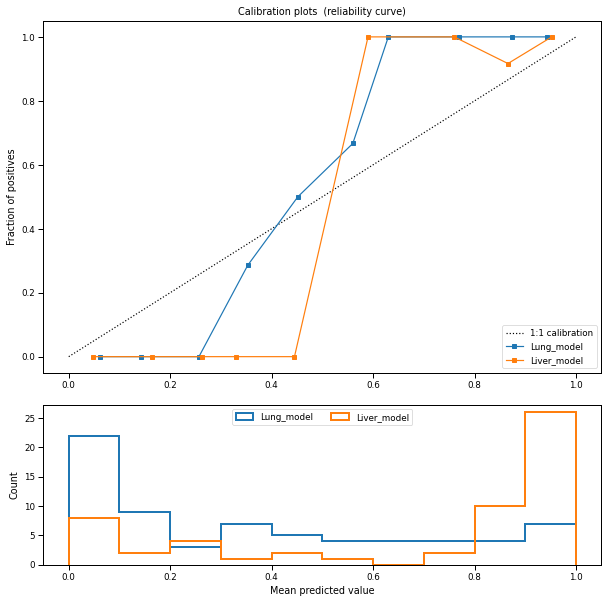

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="1:1 calibration")
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
calibration_table = pd.DataFrame(columns=['classifiers', 'fraction_of_positives','mean_predicted_values'])

for cls in classifiers:
    if cls == "Liver_model":
        model = model.fit(Liver_X_train, Liver_y_train)
        Liver_y_score = model.predict_proba(Liver_X_test)[::,1]
        
        fpr, tpr, _ = roc_curve(Liver_y_test,  Liver_y_score,pos_label="Positive")
        auc = roc_auc_score(Liver_y_test, Liver_y_score)
        fraction_of_positives, mean_predicted_value = calibration_curve(Liver_y_test, Liver_y_score, n_bins=10)
        calibration_curve(Liver_y_test, Liver_y_score, n_bins=10)
        result_table = result_table.append({'classifiers':"Liver",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        
        calibration_table = calibration_table.append({'classifiers':"Liver",
                                        'fraction_of_positives':fraction_of_positives, 
                                        'mean_predicted_values':mean_predicted_value}, ignore_index=True)
        
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (cls, ))

        ax2.hist(Liver_y_score, range=(0, 1), bins=10, label=cls,
             histtype="step", lw=2)

        ax1.set_ylabel("Fraction of positives")
        ax1.set_ylim([-0.05, 1.05])
        ax1.legend(loc="lower right")
        ax1.set_title('Calibration plots  (reliability curve)')

        ax2.set_xlabel("Mean predicted value")
        ax2.set_ylabel("Count")
        ax2.legend(loc="upper center", ncol=2)
        
    if cls == "Lung_model":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lung_y_test,  Lung_y_score,pos_label="Positive")
        auc = roc_auc_score(Lung_y_test, Lung_y_score)
        fraction_of_positives, mean_predicted_value = calibration_curve(Lung_y_test, Lung_y_score, n_bins=10)
        
        # proper calibration with 10 bins should show a sigmoidla curve. 
        calibration_curve(Lung_y_test, Lung_y_score, n_bins=10)
        result_table = result_table.append({'classifiers':"Lung",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        # extract posterprobabilities using the predict proba function, document the fraction of positive calls against the mean predicted value to assess confience in the model. 
        This will show the mean predicted values among the trees. 
        calibration_table = calibration_table.append({'classifiers':"Lung",
                                        'fraction_of_positives':fraction_of_positives, 
                                        'mean_predicted_values':mean_predicted_value}, ignore_index=True)
        
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (cls, ))

        ax2.hist(Lung_y_score, range=(0, 1), bins=10, label=cls,
             histtype="step", lw=2)

        ax1.set_ylabel("Fraction of positives")
        ax1.set_ylim([-0.05, 1.05])
        ax1.legend(loc="lower right")
        ax1.set_title('Calibration plots  (reliability curve)')

        ax2.set_xlabel("Mean predicted value")
        ax2.set_ylabel("Count")
        ax2.legend(loc="upper center", ncol=2)
        
    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
calibration_table.set_index('classifiers', inplace=True)


In [208]:
# ROC

import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('LIHC: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('LIHC_roc_curve.png')





                                         fraction_of_positives  \
classifiers                                                      
Lung         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333...   
Liver        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         mean_predicted_values  
classifiers                                                     
Lung         [0.04363636363636363, 0.07909090909090909, 0.1...  
Liver        [0.024999999999999998, 0.07250000000000001, 0....  


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


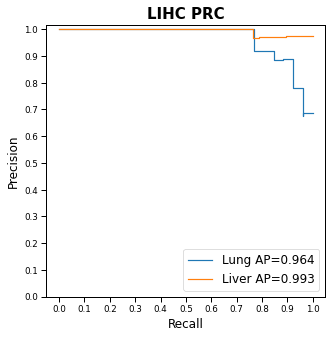

In [180]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

sns.set_context("paper")
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:
    if cls == "Liver_model":
        model = model.fit(Liver_X_train, Liver_y_train)
        Liver_y_score = model.predict_proba(Liver_X_test)[::,1]
        
        average_precision = average_precision_score(Liver_y_test, Liver_y_score, pos_label="Positive")
        
        # disp
        disp = plot_precision_recall_curve(model, Liver_X_test, Liver_y_test, ax =ax, label="Liver AP={:.3f}".format(average_precision))
        
    if cls == "Lung_model":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
        
        average_precision = average_precision_score(Lung_y_test, Lung_y_score, pos_label="Positive")
        
        disp = plot_precision_recall_curve(model, Lung_X_test, Lung_y_test, ax =ax, label= "Lung AP={:.3f}".format(average_precision))
        

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('LIHC PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('LIHC_PRC_curve.png')        

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.


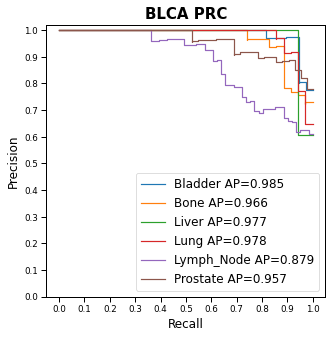

In [159]:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
sns.set_context("paper")
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
path = os.getcwd()
###############################################################################

# BLCA:

# Bladder
Bladder_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Bladder_feature_selected_train.csv")
Bladder_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Bladder_feature_selected_test.csv")
Bladder_y_train = np.array(Bladder_X_train.pop('Bladder'))
Bladder_y_test = np.array(Bladder_X_test.pop('Bladder'))
# Bone
Bone_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Bone_feature_selected_train.csv')
Bone_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Bone_feature_selected_test.csv')
Bone_y_train = np.array(Bone_X_train.pop('Bone'))
Bone_y_test = np.array(Bone_X_test.pop('Bone'))
# Lung
Lung_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
Lung_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lung_feature_selected_test.csv')
Lung_y_train = np.array(Lung_X_train.pop('Lung'))
Lung_y_test = np.array(Lung_X_test.pop('Lung'))
# Liver
Liver_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Liver_feature_selected_train.csv")
Liver_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Liver_feature_selected_test.csv")
Liver_y_train = np.array(Liver_X_train.pop('Liver'))
Liver_y_test = np.array(Liver_X_test.pop('Liver'))
# Lymph_Node
Lymph_Node_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lymph_Node_feature_selected_train.csv")
Lymph_Node_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Lymph_Node_feature_selected_test.csv")
Lymph_Node_y_train = np.array(Lymph_Node_X_train.pop('Lymph Node'))
Lymph_Node_y_test = np.array(Lymph_Node_X_test.pop('Lymph Node'))
# Pelvis
Pelvis_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Pelvis_feature_selected_train.csv')
Pelvis_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Pelvis_feature_selected_test.csv')
Pelvis_y_train = np.array(Pelvis_X_train.pop('Pelvis'))
Pelvis_y_test = np.array(Pelvis_X_test.pop('Pelvis'))
# Prostate
Prostate_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Prostate_feature_selected_train.csv')
Prostate_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BLCA_metastatic_data_RNAseq_Prostate_feature_selected_test.csv')
Prostate_y_train = np.array(Prostate_X_train.pop('Prostate'))
Prostate_y_test = np.array(Prostate_X_test.pop('Prostate'))

# Put model plus plotting here

# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)

classifiers = ["Bladder", "Bone", "Liver", "Lung", "Lymph_Node", "Pelvis", "Prostate"]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:
    if cls == "Bladder":
        model = model.fit(Bladder_X_train, Bladder_y_train)
        Bladder_y_score = model.predict_proba(Bladder_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Bladder_y_test,  Bladder_y_score,pos_label="Positive")
        auc = roc_auc_score(Bladder_y_test, Bladder_y_score)
        
        result_table = result_table.append({'classifiers':"Bladder",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Bladder_y_test, Bladder_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Bladder_X_test, Bladder_y_test, ax =ax, label="Bladder AP={:.3f}".format(average_precision))

    if cls == "Bone":
        model = model.fit(Bone_X_train, Bone_y_train)
        Bone_y_score = model.predict_proba(Bone_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Bone_y_test,  Bone_y_score,pos_label="Positive")
        auc = roc_auc_score(Bone_y_test, Bone_y_score)
        
        result_table = result_table.append({'classifiers':"Bone",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Bone_y_test, Bone_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Bone_X_test, Bone_y_test, ax =ax, label="Bone AP={:.3f}".format(average_precision))
    
    if cls == "Liver":
        model = model.fit(Liver_X_train, Liver_y_train)
        Liver_y_score = model.predict_proba(Liver_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Liver_y_test,  Liver_y_score,pos_label="Positive")
        auc = roc_auc_score(Liver_y_test, Liver_y_score)
        
        result_table = result_table.append({'classifiers':"Liver",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Liver_y_test, Liver_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Liver_X_test, Liver_y_test, ax =ax, label="Liver AP={:.3f}".format(average_precision))
        
    if cls == "Lung":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lung_y_test,  Lung_y_score,pos_label="Positive")
        auc = roc_auc_score(Lung_y_test, Lung_y_score)
        
        result_table = result_table.append({'classifiers':"Lung",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lung_y_test, Lung_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lung_X_test, Lung_y_test, ax =ax, label="Lung AP={:.3f}".format(average_precision))
    
    if cls == "Lymph_Node":
        model = model.fit(Lymph_Node_X_train, Lymph_Node_y_train)
        Lymph_Node_y_score = model.predict_proba(Lymph_Node_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lymph_Node_y_test,  Lymph_Node_y_score,pos_label="Positive")
        auc = roc_auc_score(Lymph_Node_y_test, Lymph_Node_y_score)
        
        result_table = result_table.append({'classifiers':"Lymph_Node",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lymph_Node_y_test, Lymph_Node_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lymph_Node_X_test, Lymph_Node_y_test, ax =ax, label="Lymph_Node AP={:.3f}".format(average_precision))
    if cls == "Prostate":
        model = model.fit(Prostate_X_train, Prostate_y_train)
        Prostate_y_score = model.predict_proba(Prostate_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Prostate_y_test,  Prostate_y_score,pos_label="Positive")
        auc = roc_auc_score(Prostate_y_test, Prostate_y_score)
        
        result_table = result_table.append({'classifiers':"Prostate",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Prostate_y_test, Prostate_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Prostate_X_test, Prostate_y_test, ax =ax, label="Prostate AP={:.3f}".format(average_precision))

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('BLCA PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('BLCA_PRC_curve.png')


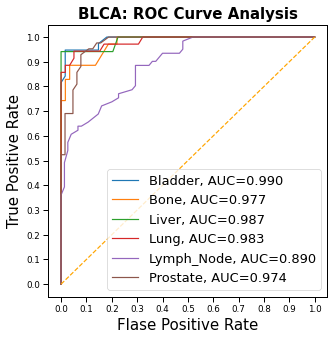

In [160]:
# ROC 
import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('BLCA: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('BLCA_roc_curve.png')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.


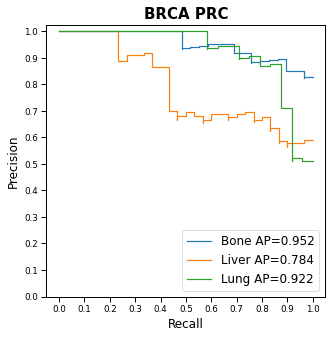

In [161]:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
sns.set_context("paper")
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
path = os.getcwd()
###############################################################################


# BRCA:
# Bone
Bone_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Bone_feature_selected_train.csv')
Bone_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Bone_feature_selected_test.csv')
Bone_y_train = np.array(Bone_X_train.pop('Bone'))
Bone_y_test = np.array(Bone_X_test.pop('Bone'))
# Lung
Lung_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
Lung_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Lung_feature_selected_test.csv')
Lung_y_train = np.array(Lung_X_train.pop('Lung'))
Lung_y_test = np.array(Lung_X_test.pop('Lung'))
# Liver
Liver_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Liver_feature_selected_train.csv")
Liver_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-BRCA_metastatic_data_RNAseq_Liver_feature_selected_test.csv")
Liver_y_train = np.array(Liver_X_train.pop('Liver'))
Liver_y_test = np.array(Liver_X_test.pop('Liver'))

import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)


classifiers = ["Bone", "Liver", "Lung"]

result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:

    if cls == "Bone":
        model = model.fit(Bone_X_train, Bone_y_train)
        Bone_y_score = model.predict_proba(Bone_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Bone_y_test,  Bone_y_score,pos_label="Positive")
        auc = roc_auc_score(Bone_y_test, Bone_y_score)
        
        result_table = result_table.append({'classifiers':"Bone",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Bone_y_test, Bone_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Bone_X_test, Bone_y_test, ax =ax, label="Bone AP={:.3f}".format(average_precision))
    
    if cls == "Liver":
        model = model.fit(Liver_X_train, Liver_y_train)
        Liver_y_score = model.predict_proba(Liver_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Liver_y_test,  Liver_y_score,pos_label="Positive")
        auc = roc_auc_score(Liver_y_test, Liver_y_score)
        
        result_table = result_table.append({'classifiers':"Liver",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Liver_y_test, Liver_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Liver_X_test, Liver_y_test, ax =ax, label="Liver AP={:.3f}".format(average_precision))
        
    if cls == "Lung":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lung_y_test,  Lung_y_score,pos_label="Positive")
        auc = roc_auc_score(Lung_y_test, Lung_y_score)
        
        result_table = result_table.append({'classifiers':"Lung",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lung_y_test, Lung_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lung_X_test, Lung_y_test, ax =ax, label="Lung AP={:.3f}".format(average_precision))

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('BRCA PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('BRCA_PRC_curve.png')



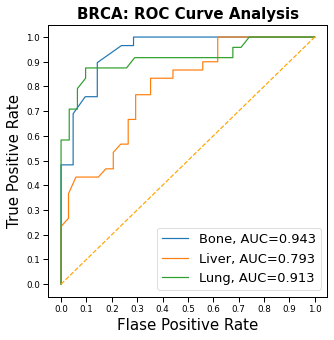

In [162]:
# ROC 
import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('BRCA: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('BRCA_roc_curve.png')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.


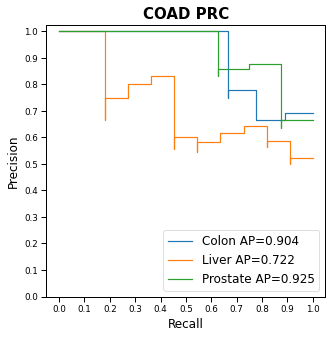

In [165]:
# COAD:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
sns.set_context("paper")
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
path = os.getcwd()
###############################################################################

# COAD:

# Colon
Colon_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Colon_feature_selected_train.csv')
Colon_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Colon_feature_selected_test.csv')
Colon_y_train = np.array(Colon_X_train.pop('Colon'))
Colon_y_test = np.array(Colon_X_test.pop('Colon'))

# Liver
Liver_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Liver_feature_selected_train.csv")
Liver_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Liver_feature_selected_test.csv")
Liver_y_train = np.array(Liver_X_train.pop('Liver'))
Liver_y_test = np.array(Liver_X_test.pop('Liver'))

Prostate_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Prostate_feature_selected_train.csv')
Prostate_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-COAD_metastatic_data_RNAseq_Prostate_feature_selected_test.csv')
Prostate_y_train = np.array(Prostate_X_train.pop('Prostate'))
Prostate_y_test = np.array(Prostate_X_test.pop('Prostate'))

# Put model plus plotting here

# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)

classifiers = ["Colon", "Liver", "Prostate"]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:
    
    if cls == "Colon":
        model = model.fit(Colon_X_train, Colon_y_train)
        Colon_y_score = model.predict_proba(Colon_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Colon_y_test,  Colon_y_score,pos_label="Positive")
        auc = roc_auc_score(Colon_y_test, Colon_y_score)
        
        result_table = result_table.append({'classifiers':"Colon",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Colon_y_test, Colon_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Colon_X_test, Colon_y_test, ax =ax, label="Colon AP={:.3f}".format(average_precision))
    
    if cls == "Liver":
        model = model.fit(Liver_X_train, Liver_y_train)
        Liver_y_score = model.predict_proba(Liver_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Liver_y_test,  Liver_y_score,pos_label="Positive")
        auc = roc_auc_score(Liver_y_test, Liver_y_score)
        
        result_table = result_table.append({'classifiers':"Liver",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Liver_y_test, Liver_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Liver_X_test, Liver_y_test, ax =ax, label="Liver AP={:.3f}".format(average_precision))
        
    if cls == "Prostate":
        model = model.fit(Prostate_X_train, Prostate_y_train)
        Prostate_y_score = model.predict_proba(Prostate_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Prostate_y_test,  Prostate_y_score,pos_label="Positive")
        auc = roc_auc_score(Prostate_y_test, Prostate_y_score)
        
        result_table = result_table.append({'classifiers':"Prostate",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Prostate_y_test, Prostate_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Prostate_X_test, Prostate_y_test, ax =ax, label="Prostate AP={:.3f}".format(average_precision))

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('COAD PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('COAD_PRC_curve.png')


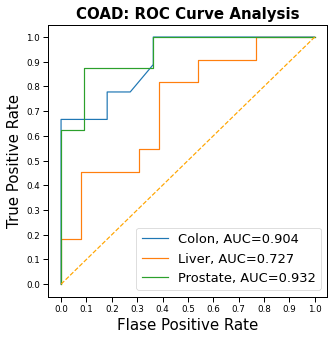

In [166]:
# ROC 
import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('COAD: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('COAD_roc_curve.png')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.


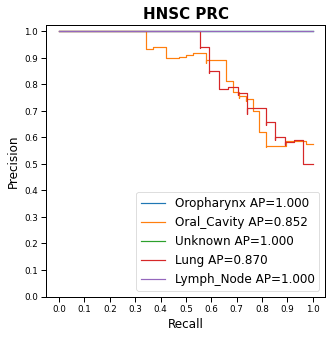

In [173]:
# HNSC:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
sns.set_context("paper")
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
path = os.getcwd()
###############################################################################

# HNSC:

# Oropharynx
Oropharynx_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Oropharynx_feature_selected_train.csv")
Oropharynx_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Oropharynx_feature_selected_test.csv")
Oropharynx_y_train = np.array(Oropharynx_X_train.pop('Oropharynx'))
Oropharynx_y_test = np.array(Oropharynx_X_test.pop('Oropharynx'))
# Oral_Cavity
Oral_Cavity_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Oral_Cavity_feature_selected_train.csv')
Oral_Cavity_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Oral_Cavity_feature_selected_test.csv')
Oral_Cavity_y_train = np.array(Oral_Cavity_X_train.pop('Oral Cavity'))
Oral_Cavity_y_test = np.array(Oral_Cavity_X_test.pop('Oral Cavity'))
# Lung
Lung_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
Lung_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Lung_feature_selected_test.csv')
Lung_y_train = np.array(Lung_X_train.pop('Lung'))
Lung_y_test = np.array(Lung_X_test.pop('Lung'))
# Unknown
Unknown_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Unknown_feature_selected_train.csv")
Unknown_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Unknown_feature_selected_test.csv")
Unknown_y_train = np.array(Unknown_X_train.pop('Unknown'))
Unknown_y_test = np.array(Unknown_X_test.pop('Unknown'))
# Lymph_Node
Lymph_Node_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Lymph_Node_feature_selected_train.csv")
Lymph_Node_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-HNSC_metastatic_data_RNAseq_Lymph_Node_feature_selected_test.csv")
Lymph_Node_y_train = np.array(Lymph_Node_X_train.pop('Lymph Node'))
Lymph_Node_y_test = np.array(Lymph_Node_X_test.pop('Lymph Node'))



# Put model plus plotting here

# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)

classifiers = ["Oropharynx", "Oral_Cavity", "Unknown", "Lung", "Lymph_Node"]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:
    if cls == "Oropharynx":
        model = model.fit(Oropharynx_X_train, Oropharynx_y_train)
        Oropharynx_y_score = model.predict_proba(Oropharynx_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Oropharynx_y_test,  Oropharynx_y_score,pos_label="Positive")
        auc = roc_auc_score(Oropharynx_y_test, Oropharynx_y_score)
        
        result_table = result_table.append({'classifiers':"Oropharynx",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Oropharynx_y_test, Oropharynx_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Oropharynx_X_test, Oropharynx_y_test, ax =ax, label="Oropharynx AP={:.3f}".format(average_precision))

    if cls == "Oral_Cavity":
        model = model.fit(Oral_Cavity_X_train, Oral_Cavity_y_train)
        Oral_Cavity_y_score = model.predict_proba(Oral_Cavity_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Oral_Cavity_y_test,  Oral_Cavity_y_score,pos_label="Positive")
        auc = roc_auc_score(Oral_Cavity_y_test, Oral_Cavity_y_score)
        
        result_table = result_table.append({'classifiers':"Oral_Cavity",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Oral_Cavity_y_test, Oral_Cavity_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Oral_Cavity_X_test, Oral_Cavity_y_test, ax =ax, label="Oral_Cavity AP={:.3f}".format(average_precision))
    
    if cls == "Unknown":
        model = model.fit(Unknown_X_train, Unknown_y_train)
        Unknown_y_score = model.predict_proba(Unknown_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Unknown_y_test,  Unknown_y_score,pos_label="Positive")
        auc = roc_auc_score(Unknown_y_test, Unknown_y_score)
        
        result_table = result_table.append({'classifiers':"Unknown",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Unknown_y_test, Unknown_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Unknown_X_test, Unknown_y_test, ax =ax, label="Unknown AP={:.3f}".format(average_precision))
        
    if cls == "Lung":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lung_y_test,  Lung_y_score,pos_label="Positive")
        auc = roc_auc_score(Lung_y_test, Lung_y_score)
        
        result_table = result_table.append({'classifiers':"Lung",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lung_y_test, Lung_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lung_X_test, Lung_y_test, ax =ax, label="Lung AP={:.3f}".format(average_precision))
    
    if cls == "Lymph_Node":
        model = model.fit(Lymph_Node_X_train, Lymph_Node_y_train)
        Lymph_Node_y_score = model.predict_proba(Lymph_Node_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lymph_Node_y_test,  Lymph_Node_y_score,pos_label="Positive")
        auc = roc_auc_score(Lymph_Node_y_test, Lymph_Node_y_score)
        
        result_table = result_table.append({'classifiers':"Lymph_Node",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lymph_Node_y_test, Lymph_Node_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lymph_Node_X_test, Lymph_Node_y_test, ax =ax, label="Lymph_Node AP={:.3f}".format(average_precision))
    if cls == "Prostate":
        model = model.fit(Prostate_X_train, Prostate_y_train)
        Prostate_y_score = model.predict_proba(Prostate_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Prostate_y_test,  Prostate_y_score,pos_label="Positive")
        auc = roc_auc_score(Prostate_y_test, Prostate_y_score)
        
        result_table = result_table.append({'classifiers':"Prostate",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Prostate_y_test, Prostate_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Prostate_X_test, Prostate_y_test, ax =ax, label="Prostate AP={:.3f}".format(average_precision))

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('HNSC PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('HNSC_PRC_curve.png')




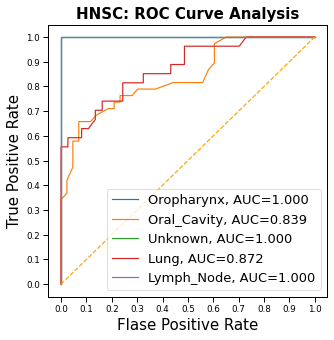

In [174]:
# ROC 
import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('HNSC: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('HNSC_roc_curve.png')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.


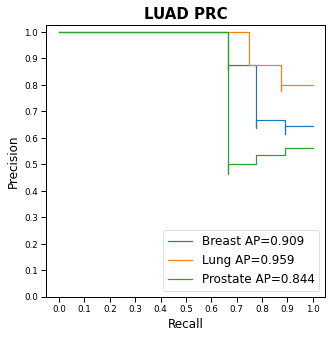

In [185]:
# LUAD:
# LUAD:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
sns.set_context("paper")
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
path = os.getcwd()
###############################################################################

# LUAD:

# Lung
Lung_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Lung_feature_selected_train.csv')
Lung_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Lung_feature_selected_test.csv')
Lung_y_train = np.array(Lung_X_train.pop('Lung'))
Lung_y_test = np.array(Lung_X_test.pop('Lung'))
# Breast
Breast_X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Breast_feature_selected_train.csv")
Breast_X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Breast_feature_selected_test.csv")
Breast_y_train = np.array(Breast_X_train.pop('Breast'))
Breast_y_test = np.array(Breast_X_test.pop('Breast'))
# Prostate
Prostate_X_train = pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Prostate_feature_selected_train.csv')
Prostate_X_test =pd.read_csv('/home/mskaro1/storage/Machine_Learning/All_MOT_selected_features/feature-selected-datasets/TCGA-LUAD_metastatic_data_RNAseq_Prostate_feature_selected_test.csv')
Prostate_y_train = np.array(Prostate_X_train.pop('Prostate'))
Prostate_y_test = np.array(Prostate_X_test.pop('Prostate'))

# Put model plus plotting here

# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)

classifiers = ["Breast", "Lung", "Prostate"]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


fig = plt.figure(figsize=(5,5))
ax = plt.gca()

for cls in classifiers:
    
    if cls == "Breast":
        model = model.fit(Breast_X_train, Breast_y_train)
        Breast_y_score = model.predict_proba(Breast_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Breast_y_test,  Breast_y_score,pos_label="Positive")
        auc = roc_auc_score(Breast_y_test, Breast_y_score)
        
        result_table = result_table.append({'classifiers':"Breast",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Breast_y_test, Breast_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Breast_X_test, Breast_y_test, ax =ax, label="Breast AP={:.3f}".format(average_precision))
        
    if cls == "Lung":
        model = model.fit(Lung_X_train, Lung_y_train)
        Lung_y_score = model.predict_proba(Lung_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Lung_y_test,  Lung_y_score,pos_label="Positive")
        auc = roc_auc_score(Lung_y_test, Lung_y_score)
        
        result_table = result_table.append({'classifiers':"Lung",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Lung_y_test, Lung_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Lung_X_test, Lung_y_test, ax =ax, label="Lung AP={:.3f}".format(average_precision))
        
    if cls == "Prostate":
        model = model.fit(Prostate_X_train, Prostate_y_train)
        Prostate_y_score = model.predict_proba(Prostate_X_test)[::,1]
    
        fpr, tpr, _ = roc_curve(Prostate_y_test,  Prostate_y_score,pos_label="Positive")
        auc = roc_auc_score(Prostate_y_test, Prostate_y_score)
        
        result_table = result_table.append({'classifiers':"Prostate",
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        average_precision = average_precision_score(Prostate_y_test, Prostate_y_score, pos_label="Positive")
        disp = plot_precision_recall_curve(model, Prostate_X_test, Prostate_y_test, ax =ax, label="Prostate AP={:.3f}".format(average_precision))

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('LUAD PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('LUAD_PRC_curve.png')







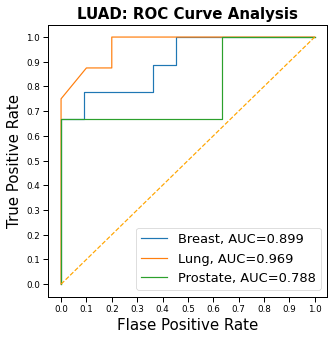

In [186]:
# ROC 
import seaborn as sns
sns.set_context("paper")

fig = plt.figure(figsize=(5,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('LUAD: ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
fig.savefig('LUAD_roc_curve.png')